In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def E0_gen(P,wx,wy):
    return np.sqrt(4*377*P/np.pi/wx/wy)

def D_calc(r,t,phi):
    D=r+t**2*np.exp(1j*phi)/(1-r*np.exp(1j*phi))
    return D

def Offset(A,D):
    return (np.abs(A)**2*(1-np.abs(D))**2)/2/377

def Lattice_depth(A,D):
    return 4*np.abs(A)**2*np.abs(D)**2/2/377

def realphase(D): # field phase
    return np.angle(D, deg=False)

In [3]:
# parameters
alpha_r=-5.262193843977613e-37
alpha_g=1.0728733273187998e-36
kB=1.380649E-23

In [4]:
# calculate A
P=2 #W
wx=200E-6
wy=100E-6
A=E0_gen(P,wx,wy)

In [127]:
phasespace=np.linspace(0,2*np.pi,4001)
t_g=np.sqrt(0.99); r_g=np.sqrt(1-0.99)
t_r=np.sqrt(1-0.995); r_r=np.sqrt(0.995)
Dg=D_calc(r_g,t_g,phasespace)
Dr=D_calc(r_r,t_r,phasespace)
offset_g=Offset(A,Dg)*alpha_g/kB*1E6
offset_r=Offset(A,Dr)*alpha_r/kB*1E6

# plt.plot(offset_g)
# plt.plot(offset_r)

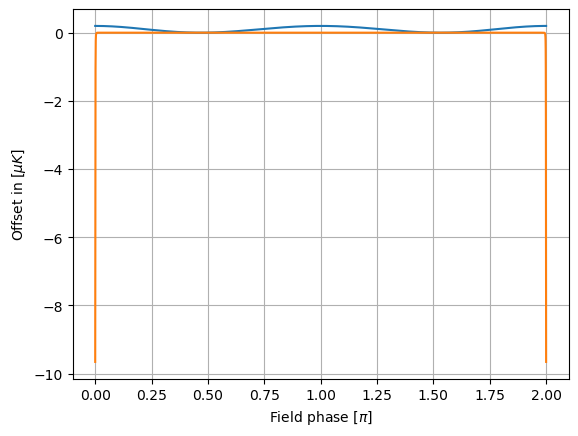

In [128]:
# plot offsets

plt.plot(phasespace/np.pi,offset_g)
plt.plot(phasespace/np.pi,offset_r)
plt.ylabel("Offset in [$\mu K$]")
plt.xlabel("Field phase [$\pi$]")
plt.grid()

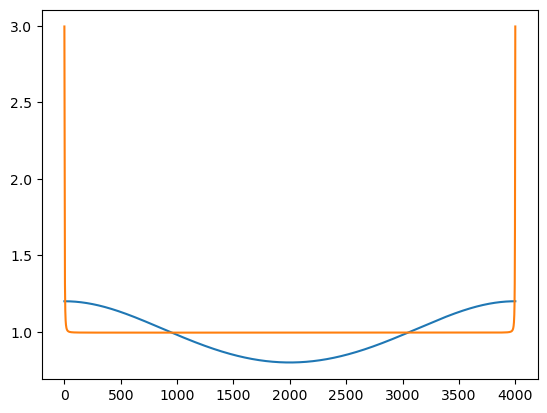

In [129]:
plt.plot(np.abs(Dg))
plt.plot(np.abs(Dr))

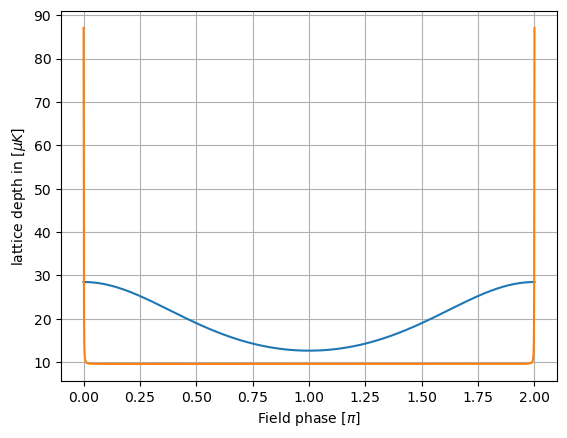

In [130]:
depth_g=Lattice_depth(A,Dg)*alpha_g/kB*1E6
depth_r=Lattice_depth(A,Dr)*alpha_r/kB*1E6

plt.plot(phasespace/np.pi,depth_g)
plt.plot(phasespace/np.pi,-depth_r)
plt.ylabel("lattice depth in [$\mu K$]")
plt.xlabel("Field phase [$\pi$]")
plt.grid()

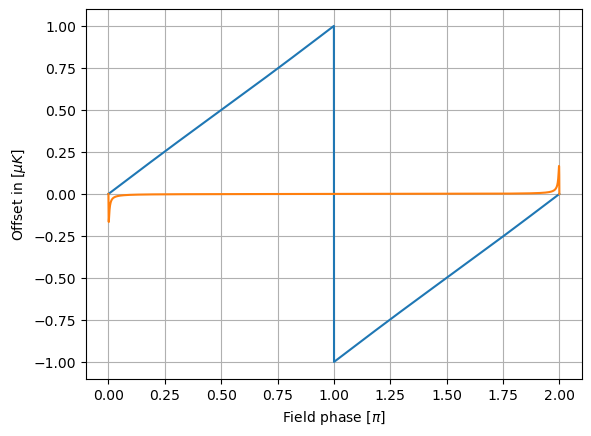

In [131]:
phase_g=realphase(Dg)
phase_r=realphase(Dr)

plt.plot(phasespace/np.pi,phase_g/np.pi)
plt.plot(phasespace/np.pi,-phase_r/np.pi)
plt.ylabel("Offset in [$\mu K$]")
plt.xlabel("Field phase [$\pi$]")
plt.grid()